### <u>Project4</u>: **Retail Analysis with Walmart Data**


#### We have a sales prediction topic for one of the leading retail stores in the United States, Walmart. The data we have are available for the weekly sales of 45 Walmart stores, for the period between 2010-02-05 and 2012-11-01. Sales are impacted by several factors such as unforeseen requests and stock shortages for example. <br></br>           

#### We have the task to produce some statistics and produce an ML model that will incorporate factors such as economic conditions, including CPI, unemployment index, etc. <br></br>     

#### More specifically, the data presents the following fields:
*   Store - the store number
*   Date - the week of sales
*   Weekly_Sales -  sales for the given store
*   Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
*   Temperature - Temperature on the day of sale
*   Fuel_Price - Cost of fuel in the region
*   CPI – Prevailing consumer price index
*   Unemployment - Prevailing unemployment rate
<br></br>

### Our work consisted first of all, in producing some statistics by answering the questions listed below and after, produce the sales prediction model. Several algorithms will be tested by studying several hypotheses.

#### **Questions**:
I- <u>Basic Statistics tasks</u>
1.	Which store has maximum sales ?
2.	
   > 2.1 Which store has maximum standard deviation ? i.e., the sales vary a lot. Also,   
   > 2.2 find out the coefficient of mean to standard deviation
3.	Which store/s has good quarterly growth rate in Q3’2012
4.	Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
5.	Provide a monthly and semester view of sales in units and give insights

II- <u>Statistical Model</u>
1.	Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
2.	The same task by change dates into days (creating new variable)
3.	Select the model with best accuracy

<u>Holiday Events</u>:     
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13    
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13    
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13    
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13




# **Required Libraries**

In [2]:
# import different libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#
# Import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
#
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
#
import warnings
warnings.filterwarnings('ignore')
#
%matplotlib inline


# **Loading data & Basic informations**

In [3]:
# Loading data with Store as index  
df_init = pd.read_csv('/content/Walmart_Store_sales.csv')
#
df=df_init.copy()
# Top 5 records
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# List of columns
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
# Shape of the dataset 
df.shape

(6435, 8)

In [ ]:
# dataset Information
# here what interests us ? ---> count(dataset)=6435, count(non-Null)=6435 for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# checking
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# checking
df.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

# **I- Basic Statistics**

In [28]:
df=df_init.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [29]:
# Convertion: date ---> datetime  
df['Date'] =  pd.to_datetime(df['Date'])
#
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
#
df['Semester']=1
df.loc[df['Month'] > 6, 'Semester']=2
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Day           6435 non-null   int64         
 11  Semester      6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


In [31]:
for col in df.columns:
  print(col,len(df[col].value_counts()))

Store 45
Date 143
Weekly_Sales 6435
Holiday_Flag 2
Temperature 3528
Fuel_Price 892
CPI 2145
Unemployment 349
Year 3
Month 12
Day 31
Semester 2


In [32]:
np.array(set(df.Store.values))

array({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45},
      dtype=object)

In [33]:
serie_t=df.Store.value_counts().sort_index(axis=0)
np.array(dict(serie_t)) # np.array() to shwing the information as row for for convenience 

array({1: 143, 2: 143, 3: 143, 4: 143, 5: 143, 6: 143, 7: 143, 8: 143, 9: 143, 10: 143, 11: 143, 12: 143, 13: 143, 14: 143, 15: 143, 16: 143, 17: 143, 18: 143, 19: 143, 20: 143, 21: 143, 22: 143, 23: 143, 24: 143, 25: 143, 26: 143, 27: 143, 28: 143, 29: 143, 30: 143, 31: 143, 32: 143, 33: 143, 34: 143, 35: 143, 36: 143, 37: 143, 38: 143, 39: 143, 40: 143, 41: 143, 42: 143, 43: 143, 44: 143, 45: 143},
      dtype=object)

In [34]:
df.Year.value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [35]:
df.Semester.value_counts()

1    3240
2    3195
Name: Semester, dtype: int64

In [36]:
serie_t=df.Month.value_counts().sort_index(axis=0)
np.array(dict(serie_t)) # np.array() to shwing the information as row for for convenience 

array({1: 450, 2: 495, 3: 540, 4: 630, 5: 585, 6: 540, 7: 585, 8: 540, 9: 585, 10: 585, 11: 405, 12: 495},
      dtype=object)

In [37]:
serie_t=df.Day.value_counts().sort_index(axis=0)
np.array(dict(serie_t)) # np.array() to shwing the information as row for for convenience 

array({1: 90, 2: 270, 3: 270, 4: 225, 5: 180, 6: 270, 7: 225, 8: 225, 9: 225, 10: 225, 11: 180, 12: 180, 13: 225, 14: 180, 15: 180, 16: 225, 17: 225, 18: 225, 19: 225, 20: 225, 21: 180, 22: 180, 23: 225, 24: 225, 25: 225, 26: 225, 27: 225, 28: 180, 29: 180, 30: 225, 31: 90},
      dtype=object)

In [38]:
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

## 1-	Which store has maximum sales ?

In [39]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
#train.set_index('Date',inplace=True)

# extract out the time-series
sales=df.groupby('Store')['Weekly_Sales'].sum()
sales.head()

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [40]:
################################
### List stores with sales max 
################################
#
# Total sales by Store
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
total_sales_by_store.head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


We see ===============================

In [41]:
#### Another approach without going through sorting
#
# Max sales of all Stores
sales_max=total_sales_by_store.max()
print('sales_max=',sales_max)
#
count_stores_with_sales_max=total_sales_by_store[total_sales_by_store==sales_max].count()
#
list_stores_with_sales_max=[]
for i in range(0,count_stores_with_sales_max):
  list_stores_with_sales_max.append(total_sales_by_store[total_sales_by_store==sales_max].index[i])
#
print('list_stores_with_sales_max=',list_stores_with_sales_max)

sales_max= 301397792.46
list_stores_with_sales_max= [20]


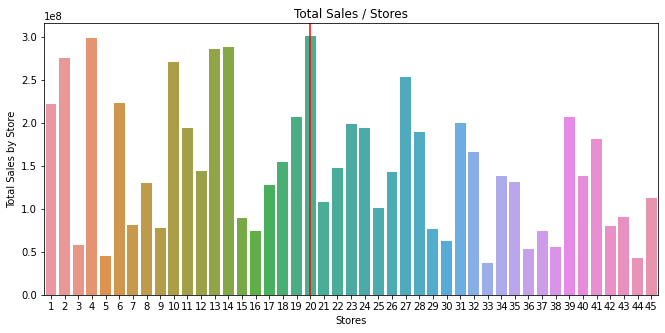

In [ ]:
####################################
### Graphic: Total Sales / Stores
####################################
plt.figure(figsize=(11,5))
# ax=sns.scatterplot(total_sales_by_store.index, total_sales_by_store)
ax=sns.barplot(total_sales_by_store.index, total_sales_by_store)
#
ax.set(xlabel ='Stores', ylabel ='Total Sales by Store')
#
# giving title to the plot
plt.title('Total Sales / Stores');
plt.axvline(x=list_stores_sales_max[0]-1,color='red')    #******* Sales Max
#
# function to show plot
plt.show()


In [ ]:
total_sales_by_store___sup27 = df[df['Store']==27].groupby('Store')['Weekly_Sales'].sum()
vv=total_sales_by_store___sup27.iat[0]
#df[total_sales_by_store___sup['Store']==20]
#df[total_sales_by_store___sup>]
len(df[ df['Weekly_Sales'] > 2554806.68]) #.groupby('Store')['Weekly_Sales'].sum()
total_sales_by_store___sup27.iat[0]
gros=df.groupby('Store')['Weekly_Sales'].sum()
df_gros=pd.DataFrame(gros)
#gros[gros[['Weekly_Sales']]> vv]
df_gros
df_gros[df_gros['Weekly_Sales']> vv]

,Weekly_Sales
Store,
2,2.753824e+08
4,2.995440e+08
10,2.716177e+08
13,2.865177e+08
14,2.889999e+08
20,3.013978e+08


## 2- Standard deviation & Coefficient of mean to standard deviation 

### 2.1 Which store has maximum standard deviation ? (i.e. the sales vary a lot)

In [ ]:
# Standard deviation of Sales by Store
std_dev_sales_by_store = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
std_dev_sales_by_store.head()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

In [ ]:
#*** Standard deviation max for all Stores
std_dev_sales_max=std_dev_sales_by_store.max()
std_dev_sales_max

317569.9494755081

In [ ]:
################################
### "Stores list" with max Standard deviation
################################
count_stores_with_std_dev_sales_max=std_dev_sales_by_store[std_dev_sales_by_store==std_dev_sales_max].count()
#
list_stores_with_std_dev_sales_max=[]
for i in range(0,count_stores_with_std_dev_sales_max):
  list_stores_with_std_dev_sales_max.append(std_dev_sales_by_store[std_dev_sales_by_store==std_dev_sales_max].index[i])
#
list_stores_with_std_dev_sales_max


[14]

In [ ]:
# check
std_dev_sales_by_store[list_stores_with_std_dev_sales_max[0]]

317569.9494755081

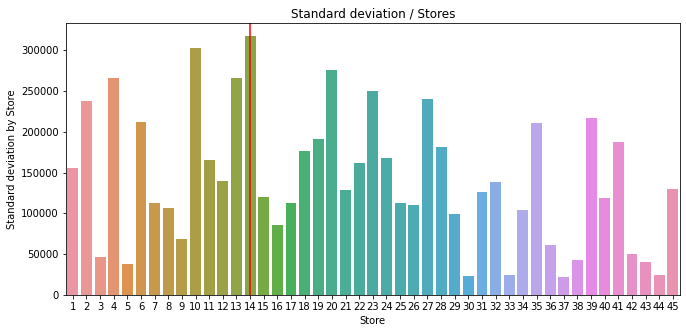

In [ ]:
###########################################
### Graphic: Standard Deviation / Stores
############################################
plt.figure(figsize=(11,5))
#ax=sns.scatterplot(std_dev_sales_by_store.index, std_dev_sales_by_store)
ax=sns.barplot(std_dev_sales_by_store.index, std_dev_sales_by_store)
#
ax.set(label ='Stores', ylabel ='Standard deviation by Store')
# giving title to the plot
plt.title('Standard deviation / Stores');
plt.axvline(x=list_stores_with_std_dev_sales_max[0]-1,color='red')  #******* std_dev_max
# function to show plot
plt.show()

### 2.2 find out the coefficient of mean to standard deviation

In [42]:
#######################################################################
### "Stores list" with max "Coefficient of mean to standard deviation"
#######################################################################
#
coef_mean_std = df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean()
#coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std.count(),len(df['Store'].unique())


(45, 45)

In [43]:
coef_mean_std.sort_values(axis=0, ascending=False)[:5]

Store
35    0.229681
7     0.197305
15    0.193384
29    0.183742
23    0.179721
Name: Weekly_Sales, dtype: float64

In [44]:
#*** Coefficient of mean to standard deviation
coef_mean_std_max=coef_mean_std.max()
coef_mean_std_max

0.2296811138997643

In [45]:

list_stores_coef_mean_std_max=[]
for items in coef_mean_std.iteritems(): 
    if items[1]==coef_mean_std_max:
      list_stores_coef_mean_std_max.append(items[0])
# 
print("Stores Number with max Coefficient of mean to standard deviation: ", len(list_stores_coef_mean_std_max))
print("list_stores_coef_mean_std_max: ", list_stores_coef_mean_std_max) 

Stores Number with max Coefficient of mean to standard deviation:  1
list_stores_coef_mean_std_max:  [35]


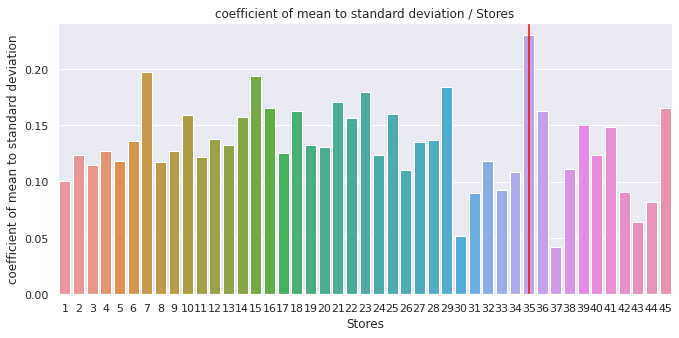

In [ ]:
plt.figure(figsize=(11,5))
#ax=sns.scatterplot(coef_mean_std.index, coef_mean_std)
ax=sns.barplot(coef_mean_std.index, coef_mean_std)
#
ax.set(xlabel ='Stores', ylabel ='coefficient of mean to standard deviation')
plt.axvline(x=list_stores_coef_mean_std_max[0]-1,color='red')  #******* coef_mean_std_max
# giving title to the plot
plt.title('coefficient of mean to standard deviation / Stores');
# function to show plot
plt.show()

In [46]:
# Sales for store with max of "coefficient of mean to standard deviation": (i.e. Store 35)
sales_for_store_with_max_coefMeanStd=df[df['Store'] == list_stores_coef_mean_std_max[0]]['Weekly_Sales']
len(sales_for_store_with_max_coefMeanStd)

143

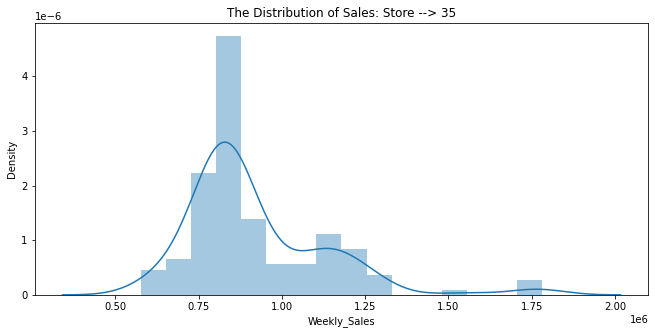

In [50]:
plt.figure(figsize=(11,5))
#ax=sns.scatterplot(std_dev_sales_by_store.index, std_dev_sales_by_store)
sns.distplot(sales_for_store_with_max_coefMeanStd)
#
# giving title to the plot
plt.title('The Distribution of Sales: Store --> '+ str(list_stores_coef_mean_std_max[0]));



## 3- Which store/s has good quarterly growth rate in Q3’2012 ?

In [ ]:
#*** type(column Date) ---> is object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Day           6435 non-null   int64         
 11  Semester      6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


In [ ]:
#*** Sales for quarterly Q3'2012
sales_Q32012_by_store = df[(df['Date'] > '2012-07-01') & (df['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
#
sales_Q32012_by_store.shape


(45,)

In [ ]:
sales_Q32012_by_store.sort_values(axis=0, ascending=False)[:5]

Store
4     25652119.35
20    24665938.11
13    24319994.35
2     22396867.61
10    21169356.45
Name: Weekly_Sales, dtype: float64

In [ ]:
# Max of Q3'2012 Sales for all stores
sales_Q32012_by_store_max=sales_Q32012_by_store.max()
#
#*** List of stores with sales_Q32012_by_store_max
list_sales_Q32012_by_store_max=[]
for items in sales_Q32012_by_store.iteritems(): 
    if items[1]==sales_Q32012_by_store_max:
      list_sales_Q32012_by_store_max.append(items[0])
#
print('sales_Q32012_by_store_max =',sales_Q32012_by_store_max)
print('')
print("list_sales_Q32012_by_store_max =", list_sales_Q32012_by_store_max)

sales_Q32012_by_store_max = 25652119.35

list_sales_Q32012_by_store_max = [4]


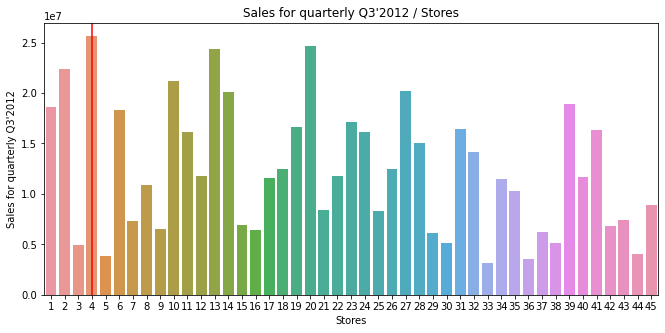

In [ ]:
#################################################
### Figure Sales for quarterly Q3\'2012 by Stores
#################################################
plt.figure(figsize=(11,5))
#ax=sns.scatterplot(sales_Q32012_by_store.index, sales_Q32012)
ax=sns.barplot(sales_Q32012_by_store.index, sales_Q32012_by_store)
#
ax.set(xlabel ='Stores', ylabel ='Sales for quarterly Q3\'2012')
plt.axvline(x=list_sales_Q32012_by_store_max[0]-1,color='red')    #******* Sales Max
# giving title to the plot
plt.title('Sales for quarterly Q3\'2012 / Stores');
# function to show plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Day           6435 non-null   int64         
 11  Semester      6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


In [ ]:
#############################################
#*** Compute for Q2'2012
#*** Sales for quarterly Q2'2012
#############################################
#
sales_Q22012_by_store = df[(df['Date'] > '2012-04-01') & (df['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
#
print('sales_Q22012_by_store.shape = ', sales_Q22012_by_store.shape)
print('')
#
# Max of Q2'2012 Sales for all stores
sales_Q22012_by_store_max=sales_Q22012_by_store.max()
#
#*** List of stores with sales_Q32012_by_store_max
list_sales_Q22012_by_store_max=[]
for items in sales_Q22012_by_store.iteritems(): 
    if items[1]==sales_Q22012_by_store_max:
      list_sales_Q22012_by_store_max.append(items[0])
#
print('sales_Q22012_by_store_max =',sales_Q22012_by_store_max)
print('')
print("list_sales_Q22012_by_store_max =", list_sales_Q22012_by_store_max)

sales_Q22012_by_store.shape =  (45,)

sales_Q22012_by_store_max = 28384185.16

list_sales_Q22012_by_store_max = [4]


In [ ]:
#sales_Q32012_by_store
sales_Q22012_by_store.head()

Store
1    21036965.58
2    25085123.61
3     5562668.16
4    28384185.16
5     4427262.21
Name: Weekly_Sales, dtype: float64

In [ ]:
# The store 4 is the best store in sales for Q2 et Q3 2012
print("store[4] for Q2-2012 & Q3-2012           ---------> ", sales_Q22012_by_store[4],'    ' ,sales_Q32012_by_store[4])
# Check
print('\n---------Check---------\n')
print("max_sales(Q2-2012) & max_sales(Q3-2012)  ---------> ", sales_Q22012_by_store_max, '    ' ,sales_Q32012_by_store_max)

store[4] for Q2-2012 & Q3-2012           --------->  28384185.16      25652119.35

---------Check---------

max_sales(Q2-2012) & max_sales(Q3-2012)  --------->  28384185.16      25652119.35


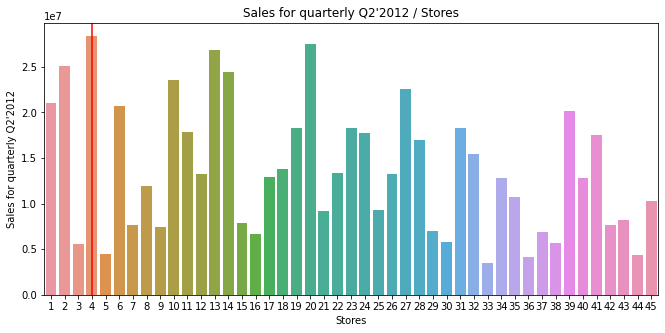

In [ ]:
# Graphic
plt.figure(figsize=(11,5))
#ax=sns.scatterplot(sales_Q32012_by_store.index, sales_Q22012)
ax=sns.barplot(sales_Q22012_by_store.index, sales_Q22012_by_store)
#
ax.set(xlabel ='Stores', ylabel ='Sales for quarterly Q2\'2012')
plt.axvline(x=list_sales_Q22012_by_store_max[0]-1,color='red')    #******* Sales Max
# giving title to the plot
plt.title('Sales for quarterly Q2\'2012 / Stores');
# function to show plot
plt.show()

In [ ]:
diff_Q32012_Q22012=np.array(sales_Q32012_by_store-sales_Q22012_by_store)
diff_Q32012_Q22012

array([-2403755.6 , -2688256.  ,  -596172.23, -2732065.81,  -546640.33,
       -2387749.05,  -291200.  , -1060415.27,  -903080.57, -2429077.48,
       -1784732.7 , -1415856.54, -2483231.2 , -4287338.66,  -958577.86,
        -184822.33, -1384893.64, -1327184.36, -1670937.25, -2884242.51,
        -822771.63, -1510521.06, -1179770.54, -1642192.12,  -938026.75,
        -800714.31, -2402402.62, -1930340.28,  -906631.12,  -604361.01,
       -1794826.89, -1273071.37,  -335065.62, -1381769.  ,  -501448.29,
        -512255.32,  -609253.88,  -603065.06, -1291630.46, -1202086.08,
       -1186447.44,  -777407.45,  -863066.64,  -302069.32, -1427657.73])

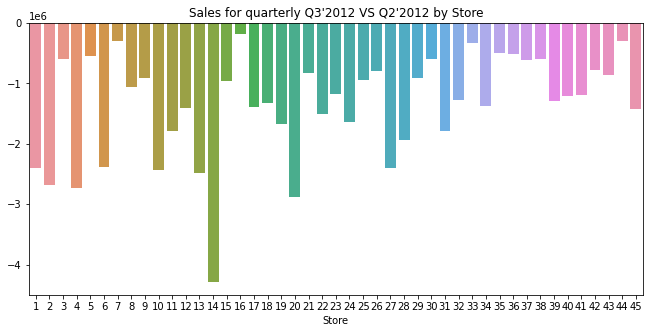

In [ ]:
# Graphic
plt.figure(figsize=(11,5))
#ax=sns.scatterplot(sales_Q32012_by_store.index, sales_Q22012)
ax=sns.barplot(sales_Q32012_by_store.index,diff_Q32012_Q22012)
plt.title('Sales for quarterly Q3\'2012 VS Q2\'2012 by Store');

In [ ]:
############################################################
### Stores wich decreasing in sale between Q2 et Q3 of 2012
############################################################
#
########################
#--- Desciption ????????
#######################
def decrease_sale_stores_list(i_rate_of_decrease=0):
  l_list_store_with_growth_rate=[]
  for items in sales_Q32012_by_store.iteritems(): 
      if items[1] < sales_Q22012_by_store[items[0]]:
        pourcentage=  round(((sales_Q22012_by_store[items[0]] - sales_Q32012_by_store[items[0]])/sales_Q32012_by_store[items[0]])*100,4)
        if pourcentage > i_rate_of_decrease:
          l_list_store_with_growth_rate.append(items[0])
  #print('list_store_with_growth_rate =', l_list_store_with_growth_rate)
  #print('len(list_store_with_growth_rate) =', len(l_list_store_with_growth_rate))
  return l_list_store_with_growth_rate

# decrease of 0%
print("stores list with sales decrease:            ", len(decrease_sale_stores_list(0)), "Stores --->",decrease_sale_stores_list(0))

# decrease of 5%
print("stores list with sales decrease at least for 5%",len(decrease_sale_stores_list(5)), "Stores --->",decrease_sale_stores_list(5))

# decrease of 5%
print("stores list withsales decrease at least for 10%",len(decrease_sale_stores_list(10)), "Stores --->",decrease_sale_stores_list(10))

# decrease of 25%
print("stores list with sales decrease at least for 20%",len(decrease_sale_stores_list(20)), "Stores --->",decrease_sale_stores_list(20))



stores list with sales decrease:             45 Stores ---> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
stores list with sales decrease at least for 5% 42 Stores ---> [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
stores list withsales decrease at least for 10% 33 Stores ---> [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 22, 24, 25, 27, 28, 29, 30, 31, 33, 34, 36, 38, 40, 42, 43, 45]
stores list with sales decrease at least for 20% 1 Stores ---> [14]




>*   **For the Q3'2012 period, sales are down compared to Q2'2012 for all stores**

>*  ** Élément de liste**



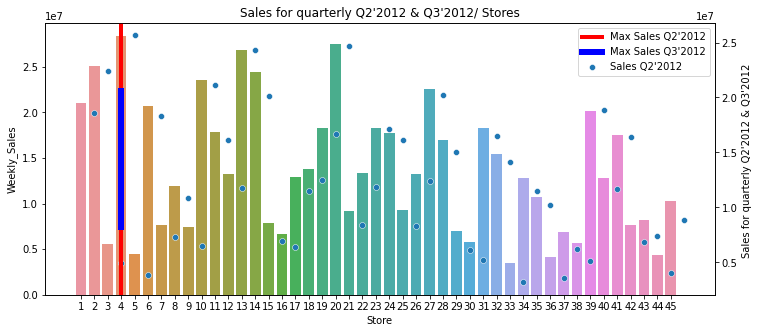

In [ ]:
plt.figure(figsize=(12,5))
#ax=sns.scatterplot(sales_Q22012_by_store.index, sales_Q22012_by_store)
ax2=sns.barplot(sales_Q22012_by_store.index, sales_Q22012_by_store)
ax= ax2.twinx()
ax=sns.scatterplot(sales_Q32012_by_store.index, sales_Q32012_by_store)
ax.set(xlabel ='Stores', ylabel ='Sales for quarterly Q2\'2012 & Q3\'2012 ')
# axvline()
plt.axvline(x=list_sales_Q22012_by_store_max[0]-1,color='red',lw=4)    #******* Sales Max for Q2'2012
plt.axvline(x=list_sales_Q32012_by_store_max[0]-1,color='blue',lw=6,ymin=0.25, ymax=0.75)   #******* Sales Max for Q3'2012
plt.legend(['Max Sales Q2\'2012','Max Sales Q3\'2012','Sales Q2\'2012'])
#
# title
plt.title('Sales for quarterly Q2\'2012 & Q3\'2012/ Stores');

#*** show plot
plt.show()

In [ ]:
sales_Q32011_by_store = df[(df['Date'] > '2011-07-01') & (df['Date'] < '2011-09-30')].groupby('Store')['Weekly_Sales'].sum()
#
diff_Q32012_Q32011=np.array(sales_Q32012_by_store-sales_Q32011_by_store)
diff_Q32012_Q32011

array([  418955.9 ,   584379.05,   371395.79,   338473.67,   230360.65,
          89854.41,   -87250.95,   259876.39,   151446.65,  -604496.9 ,
         124437.61,   277512.74,   286968.34, -4326065.28,  -368969.23,
        -171810.83,   505415.47,   400713.84,  -656267.95,   142499.  ,
        -566645.64,  -338063.34,    71771.93,  -417904.33,    16343.6 ,
         -56544.72, -1395340.33,  -265726.79,  -122080.24,   257802.46,
        -487877.69,    71896.52,   122262.17,   274518.12,   381234.91,
        -724514.53,    77433.71,   436129.44,  1343180.11,  -201034.29,
         822256.96,    22919.93,   -27749.42,   421503.96,  -290947.55])

In [ ]:
list_stores_with_sales_growthQ3_2012_2011=[i for i in range(0,len(diff_Q32012_Q22011)) if diff_Q32012_Q22011[i]>0]
list_stores_with_sales_decreaseQ3_2012_2011=[i for i in range(0,len(diff_Q32012_Q22011)) if diff_Q32012_Q22011[i]<0]
len(list_stores_with_sales_growthQ3_2012_2011), len(list_stores_with_sales_decreaseQ3_2012_2011)

(27, 18)

In [ ]:
list_stores_with_max_sales_growth=[i+1 for i in range(0,len(diff_Q32012_Q32011)) if diff_Q32012_Q32011[i]==diff_Q32012_Q32011.max()]
list_stores_with_max_sales_growth

[39]

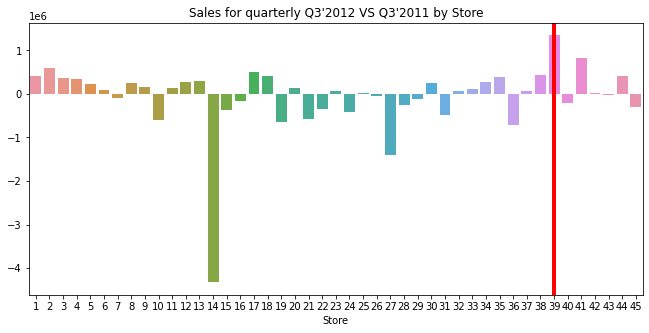

In [ ]:
# Graphic
plt.figure(figsize=(11,5))
#ax=sns.scatterplot(sales_Q32012_by_store.index, sales_Q22012)
plt.axvline(x=list_stores_with_max_sales_growth[0]-1,color='red',lw=4)    #******* Sales Max sales Q3'2012-Q3'2011
ax=sns.barplot(sales_Q32012_by_store.index,diff_Q32012_Q32011)
plt.title('Sales for quarterly Q3\'2012 VS Q3\'2011 by Store');


## 4-	Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores.

In [ ]:
df.head()
shape_h=df[df['Holiday_Flag']==1].shape 

In [ ]:
df.head()
shape_no_h=df[df['Holiday_Flag']==0].shape

In [ ]:
# Check
shape_h[0]+shape_no_h[0],len(df)

(6435, 6435)

In [ ]:
# Rappel
list_years=list(df['Year'].unique())
list_years

[2010, 2011, 2012]

In [ ]:
###################
###  For all Stores
###  h as holiday
####################
df_t_no_h=df[(df['Holiday_Flag']==0)].groupby(['Year','Month','Day'])['Weekly_Sales'].sum()
df_t_no_h

Year  Month  Day
2010  1      10     42239875.87
      2      4      50423831.26
             7      48917484.50
             19     48276993.78
             26     43968571.13
                       ...     
2012  10     8      47403451.04
             19     45122410.57
             26     45544116.29
      11     5      46925878.99
      12     10     46128514.25
Name: Weekly_Sales, Length: 133, dtype: float64

In [ ]:
# 
df_t_h=df[(df['Holiday_Flag']==1)].groupby(['Year','Month','Day'])['Weekly_Sales'].sum()
df_t_h

Year  Month  Day
2010  10     9      45634397.84
      11     26     65821003.24
      12     2      48336677.63
             31     40432519.00
2011  9      9      46763227.53
      11     2      47336192.79
             25     66593605.26
      12     30     46042461.04
2012  7      9      48330059.31
      10     2      50009407.92
Name: Weekly_Sales, dtype: float64

In [ ]:
df_t_no_h.loc[2010].mean()

47469580.061363645

In [ ]:
len(df_t_h), len(df_t_no_h.loc[2010])

(10, 44)

In [ ]:
df_t_h1=df_t_h.loc[2010].to_frame()
df_t_h1

Weekly_Sales
Month Day              
10    9     45634397.84
11    26    65821003.24
12    2     48336677.63
      31    40432519.00

In [ ]:
df_t_h2=df_t_h1[(df_t_h1['Weekly_Sales'] > df_t_no_h.loc[2010].mean())]
df_t_h2

,,Weekly_Sales
Month,Day,
11,26,65821003.24
12,2,48336677.63


In [ ]:
df_t_h2.iloc[1]

Weekly_Sales    48336677.63
Name: (12, 2), dtype: float64

In [ ]:
df_t_h2.iloc[0][0], df_t_h2.iloc[1][0]

(65821003.24, 48336677.63)

In [ ]:
for j in range(0,len(df_t_h2)):
  print(df_t_h2.iloc[j][0])
  print(df_t_h2.iloc[:].index[j])

65821003.24
(11, 26)
48336677.63
(12, 2)


In [ ]:
###################
### List ----------------------
###################
def df_salesH_greater_than_mean_sales_out_holiday(i_year):
  l_df_t_h=df_t_h.loc[i_year].to_frame()
  l_df_t_h=l_df_t_h[(l_df_t_h['Weekly_Sales'] > df_t_no_h.loc[i_year].mean())]
  #
  return l_df_t_h
#
# Check
df_salesH_greater_than_mean_sales_out_holiday(2010)

,,Weekly_Sales
Month,Day,
11,26,65821003.24
12,2,48336677.63


In [ ]:
list_years=list(df['Year'].unique())
list_years

[2010, 2011, 2012]

In [ ]:
def lst_salesH_greater_than_mean_sales_out_holiday():
  lst_r=[]
  mm=0
  dd=0
  val=0
  for i_y in  list_years:
    l_df=df_salesH_greater_than_mean_sales_out_holiday(i_y)
    for j in range(0,len(l_df)):
      mm=l_df.iloc[:].index[j][0]
      dd=l_df.iloc[:].index[j][1]
      val=l_df.iloc[j][0]
      lst_r.append(((i_y,mm,dd),val))
  return lst_r

lst_saleH_g=lst_salesH_greater_than_mean_sales_out_holiday()
lst_saleH_g

[((2010, 11, 26), 65821003.24),
 ((2010, 12, 2), 48336677.63),
 ((2011, 9, 9), 46763227.53),
 ((2011, 11, 2), 47336192.79),
 ((2011, 11, 25), 66593605.26),
 ((2012, 7, 9), 48330059.31),
 ((2012, 10, 2), 50009407.92)]

In [ ]:
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
#
Super_Bowl={2010:(2010,2,12),2011:(2011,2,11),2012:(2012,2,10),2013:(2013,2,8)}
Labour_Day={2010:(2010,9,10),2011:(2011,9,9),2012:(2012,9,7),2013:(2013,9,6)}
Thanksgiving={2010:(2010,11,26),2011:(2011,11,25),2012:(2012,11,23),2013:(2013,11,29)}
Christmas={2010:(2010,12,31),2011:(2011,12,30),2012:(2012,12,28),2013:(2013,12,27)}
#
ll=lst_salesH_greater_than_mean_sales_out_holiday()
#
ll_h=[]
for ann in list_years:
  ll_h=ll_h + [(ann,'Super_Bowl') for i in ll if (i[0][0],i[0][1],i[0][2])==Super_Bowl[ann]]
  ll_h=ll_h + [(ann,'Labour_Day') for i in ll if (i[0][0],i[0][1],i[0][2])==Labour_Day[ann]]
  ll_h=ll_h + [(ann,'Thanksgiving') for i in ll if (i[0][0],i[0][1],i[0][2])==Thanksgiving[ann]]
  ll_h=ll_h + [(ann,'Christmas') for i in ll if (i[0][0],i[0][1],i[0][2])==Christmas[ann]]
ll_h

[(2010, 'Thanksgiving'), (2011, 'Labour_Day'), (2011, 'Thanksgiving')]

In [ ]:
df_ws_2010=df[df['Year']==2010].groupby(['Month','Day'])['Weekly_Sales'].sum()
#
df_ws_2011=df[df['Year']==2011].groupby(['Month','Day'])['Weekly_Sales'].sum()
#
df_ws_2012=df[df['Year']==2012].groupby(['Month','Day'])['Weekly_Sales'].sum()
#
# Check
len(df_ws_2010)+len(df_ws_2011)+len(df_ws_2012),len(df_t_no_h)+len(df_t_h)

(143, 143)

In [ ]:
def lst_saleH_g_c_by_y(i_year):
  l_df_ws=df[df['Year']==i_year].groupby(['Month','Day'])['Weekly_Sales'].sum()
  #
  l_lst_saleH_g_c=[]
  for i in range(0,len(lst_saleH_g)):
    if lst_saleH_g[i][0][0]==i_year:
      l_lst_saleH_g_c.append(list(l_df_ws.values).index(lst_saleH_g[i][1]))
      #lst_saleH_g_c_2010.append(lst_saleH_g[i][1])
  return l_lst_saleH_g_c
#
lst_saleH_g_c_by_y(2010),lst_saleH_g_c_by_y(2011),lst_saleH_g_c_by_y(2012)

([41, 42], [34, 43, 47], [25, 37])

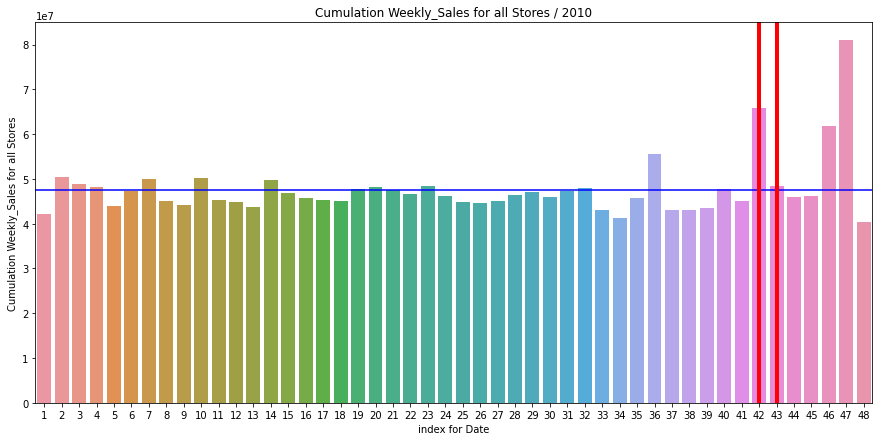

In [ ]:
# Graphic
#
def graphic_by_y(i_year):
  df_ws=df[df['Year']==i_year].groupby(['Month','Day'])['Weekly_Sales'].sum()
  #
  plt.figure(figsize=(15,7))
  ax=sns.barplot(list(range(1,len(df_ws.values)+1)),list(df_ws.values))
  #
  ax.set(xlabel ='index for Date', ylabel ='Cumulation Weekly_Sales for all Stores')
  plt.axhline(y=df_t_no_h.loc[i_year].mean(),color='blue')  
  #
  ll=lst_saleH_g_c_by_y(i_year)
  for i in range(0,len(ll)):
    plt.axvline(x=ll[i],color='red',lw=4)

  # giving title to the plot
  plt.title('Cumulation Weekly_Sales for all Stores / ' + str(i_year));
  # function to show plot
  plt.show()
#
#
graphic_by_y(2010)

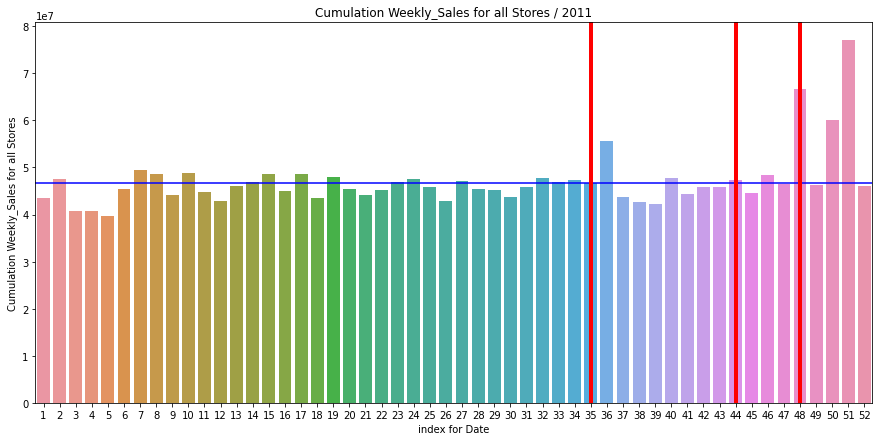

In [ ]:
graphic_by_y(2011)

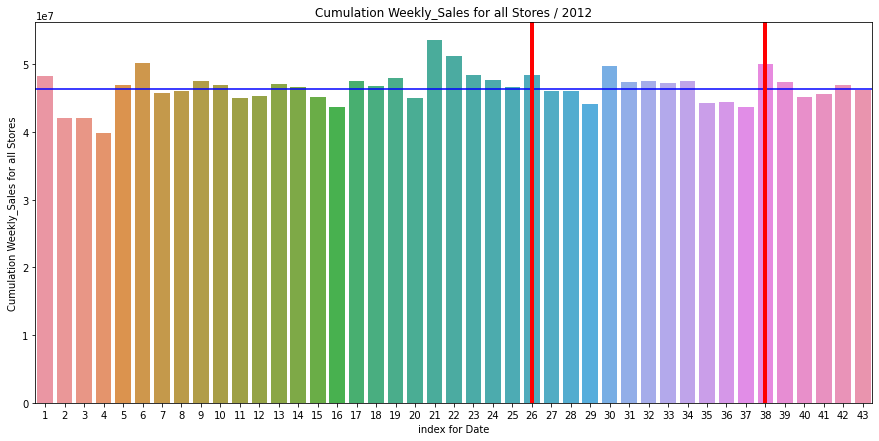

In [ ]:
graphic_by_y(2012)

In [ ]:
#############################"
##############################"
##########################"
#######################"
##########################""

## 5- Provide a monthly and semester view of sales in units and give insights.

In [ ]:
df=df_init.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Convertion: date ---> datetime  
df['Date'] =  pd.to_datetime(df['Date'])
#
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
#
df['Semester']=1
df.loc[df['Month'] > 6, 'Semester']=2
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1


In [ ]:
df_t1=df[df['Semester'] == 1 ].groupby(['Store','Year'])['Weekly_Sales'].sum()
df_t1

In [ ]:
df_t2=df[df['Semester'] != 1 ].groupby(['Store','Year','Semester'])['Weekly_Sales'].sum()
df_t2

Series([], Name: Weekly_Sales, dtype: float64)

In [ ]:
df[:].groupby(['Year','Semester'])['Weekly_Sales'].sum()

Year  Semester
2010  1           1.026913e+09
      2           1.261973e+09
2011  1           1.138060e+09
      2           1.310140e+09
2012  1           1.163004e+09
      2           8.371288e+08
Name: Weekly_Sales, dtype: float64

In [ ]:
df[:].groupby(['Store','Year','Month'])['Weekly_Sales'].sum()

In [ ]:
df[:].groupby(['Year','Month'])['Weekly_Sales'].sum()

In [ ]:
#####################
### Cumulation for all Store by month
#####################
def cumul_sales_mth_by_year(i_year):
  return df[df['Year']==i_year].groupby(['Month'])['Weekly_Sales'].sum()
#
cumul_sales_mth_by_year(2010).index.values

array([], dtype=int64)

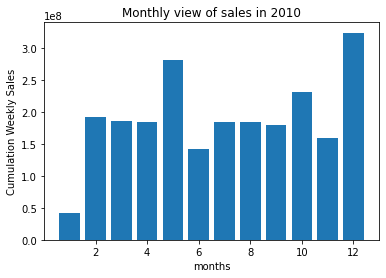

In [ ]:
plt.bar(cumul_sales_mth_by_year(2010).index.values,cumul_sales_mth_by_year(2010))
plt.xlabel("months")
plt.ylabel("Cumulation Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

In [ ]:
df1=df[df.Year==2010][df.Store==1]['Weekly_Sales'].values
len(df1)
df1_m=list(df[df.Year==2010][df.Store==1]['Month'])
len(df1), len(df1_m)

(48, 48)

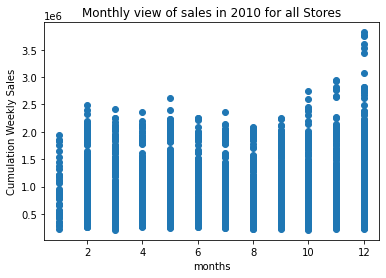

In [ ]:
plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Cumulation Weekly Sales")
plt.title("Monthly view of sales in 2010 for all Stores")
plt.show()

In [ ]:
# For store 1
df1=df[df.Year==2011][df.Store==1]['Weekly_Sales'].values
len(df1)
df1_m=list(df[df.Year==2011][df.Store==1]['Month'])
len(df1), len(df1_m)

(52, 52)

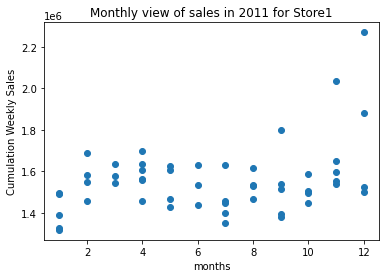

In [ ]:
plt.scatter(df1_m,df1)
plt.xlabel("months")
plt.ylabel("Cumulation Weekly Sales")
plt.title("Monthly view of sales in 2011 for Store1")
plt.show()

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,2
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,1
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,2


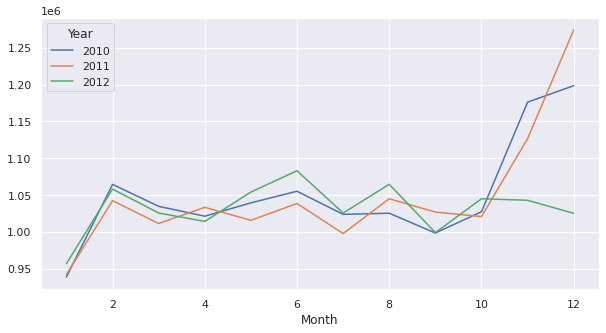

In [ ]:
#monthly_sales_by_year=df[:].groupby(['Year','Month'])['Weekly_Sales'].sum()
monthly_sales_by_year=df.groupby(['Year','Month'])['Weekly_Sales'].sum()
monthly_sales_by_year = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales_by_year.plot(figsize=(10,5))


In [ ]:
#####################
### Case Semester
#####################
def cumul_sales_semester_by_year(i_year):
  return df[df['Year']==i_year].groupby(['Semester'])['Weekly_Sales'].sum()
cumul_sales_semester_by_year(2010).index.values

array([1, 2])

In [ ]:
def get_graphic(i_year):
  plt.bar(cumul_sales_semester_by_year(i_year).index.values,cumul_sales_semester_by_year(i_year))
  plt.xlabel("Semester")
  plt.ylabel("Cumulation Weekly Sales")
  v_title='Semesterly view of sales in ' + str(i_year)
  plt.title( v_title )
  plt.show()


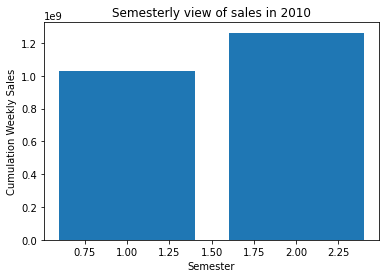

In [ ]:
get_graphic(2010)

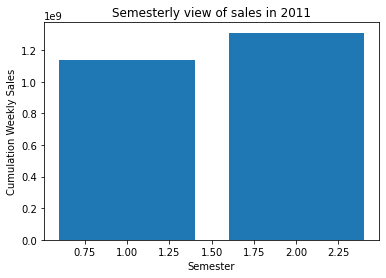

In [ ]:
  get_graphic(2011)

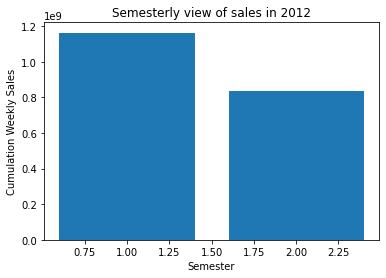

In [ ]:
 get_graphic(2012)

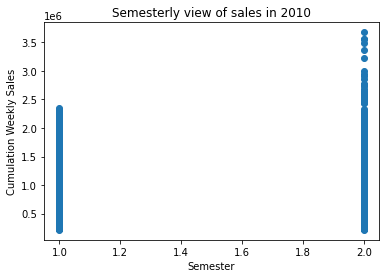

In [ ]:
plt.scatter(df[df.Year==2011]["Semester"],df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("Semester")
plt.ylabel("Cumulation Weekly Sales")
plt.title("Semesterly view of sales in 2010")
plt.show()

In [ ]:
df1_s=list(df[df.Year==2011][df.Store==1]['Semester'])
len(df1), len(df1_m),len(df1_s)

(52, 52, 52)

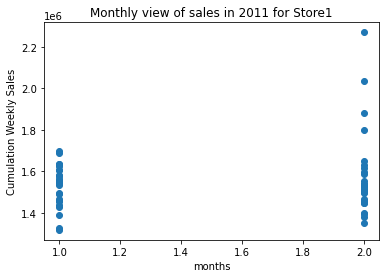

In [ ]:
plt.scatter(df1_s,df1)
plt.xlabel("months")
plt.ylabel("Cumulation Weekly Sales")
plt.title("Monthly view of sales in 2011 for Store1")
plt.show()

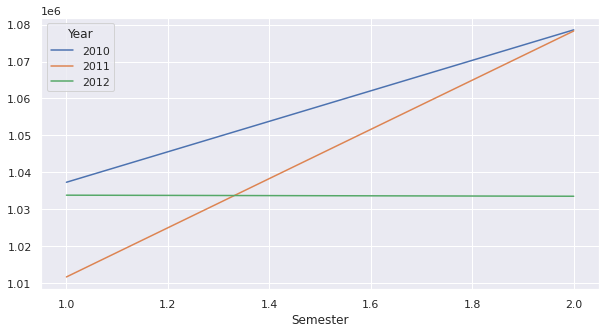

In [ ]:
#semesterly_sales_by_year=df[:].groupby(['Year','Semester'])['Weekly_Sales'].sum()
semesterly_sales_by_year=df.groupby(['Year','Semester'])['Weekly_Sales'].sum()
semesterly_sales_by_year = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Semester")
semesterly_sales_by_year.plot(figsize=(10,5))

In [ ]:
###########################################"
##########################################
#############################################"

# **II- Statistical Model**

In [4]:
df=df_init.copy()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Convertion: date ---> datetime  
df['Day'] =  pd.to_datetime(df['Date'])
#
df['Day']=df['Day'].dt.day
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Day           6435 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 452.6+ KB


In [7]:
df['Date']=pd.Series(df.index+1)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,1,1643690.90,0,42.31,2.572,211.096358,8.106,2
1,1,2,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,3,1611968.17,0,39.93,2.514,211.289143,8.106,19
3,1,4,1409727.59,0,46.63,2.561,211.319643,8.106,26
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106,3


## Analyse des dépendances et des Outliers

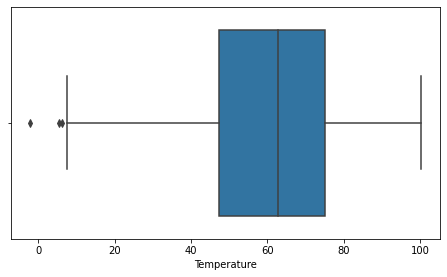

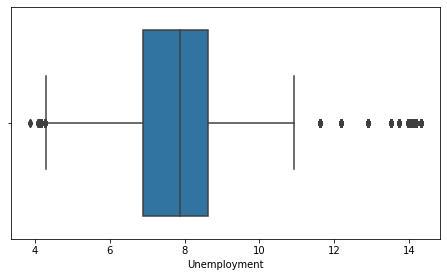

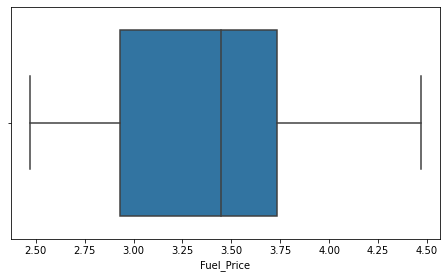

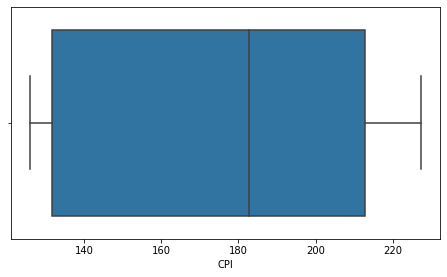

In [8]:
# Box Plot
# Position of the Outliers
import seaborn as sns
df_t1 = df[['Temperature','Unemployment','Fuel_Price','CPI']]
#
for col in df_t1.columns:
  dims = (7.7, 4.27)
  fig, ax = plt.subplots(figsize=dims)
  sns.boxplot(df_t1[col])

In [9]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
Store,1.000000e+00,0.999753,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-1.070464e-15
Date,9.997531e-01,1.000000,-0.335095,-2.952203e-04,-0.019423,0.077151,-0.207726,0.217961,1.611037e-03
Weekly_Sales,-3.353320e-01,-0.335095,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.487292e-02
Holiday_Flag,-4.386841e-16,-0.000295,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-3.603594e-02
Temperature,-2.265908e-02,-0.019423,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,8.901925e-02
Fuel_Price,6.002295e-02,0.077151,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,3.253169e-02
CPI,-2.094919e-01,-0.207726,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,3.965821e-03
Unemployment,2.235313e-01,0.217961,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-8.166853e-03
Day,-1.070464e-15,0.001611,-0.014873,-3.603594e-02,0.089019,0.032532,0.003966,-0.008167,1.000000e+00


In [10]:
df_t=df[['Store','Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment','Holiday_Flag']]

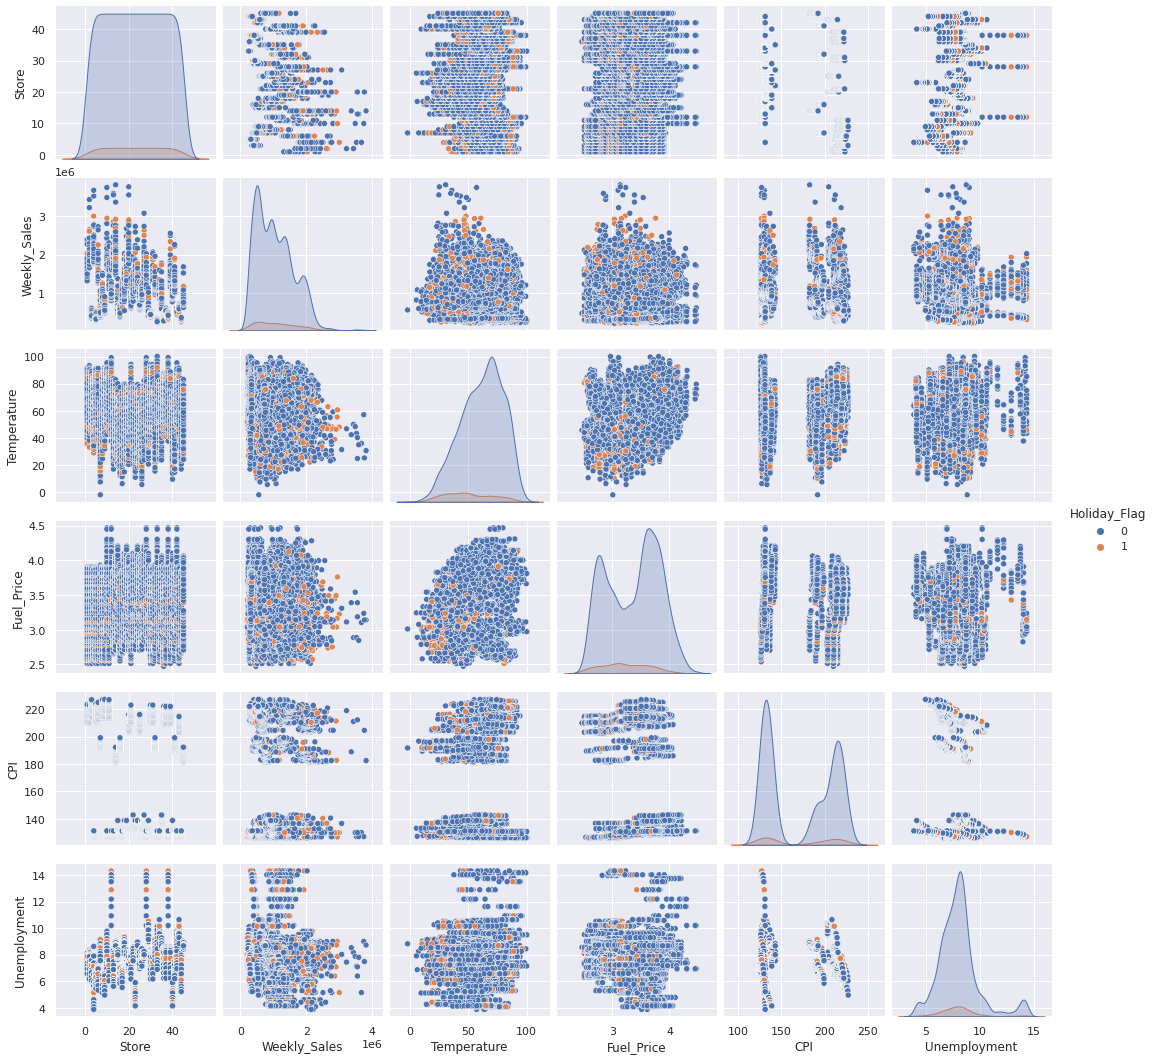

In [ ]:
sns.pairplot(df_t, hue='Holiday_Flag')

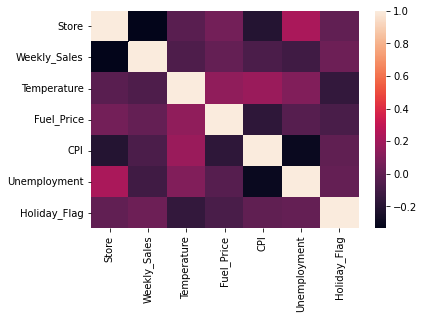

In [13]:
sns.heatmap(df_t.corr())

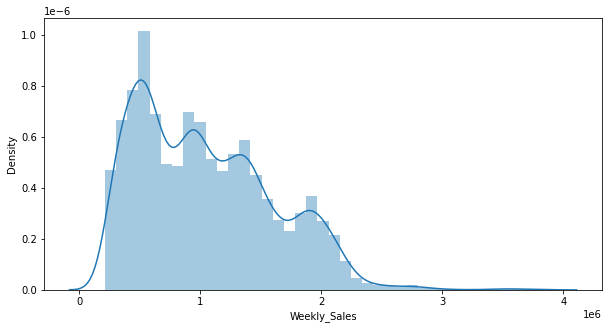

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(df['Weekly_Sales'])  

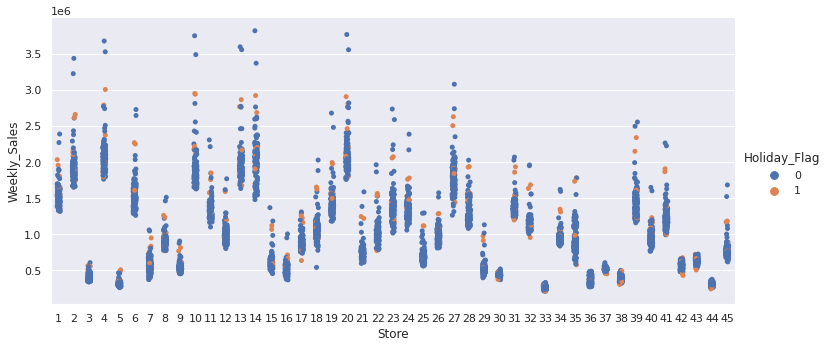

In [ ]:
sns.catplot(x='Store',y='Weekly_Sales',data=df, hue='Holiday_Flag', aspect=10.7/5.10) # height=5.27


## Build

In [ ]:
############################################################
############# Debut du BUILD
###########################################################

In [24]:
####################################
#### Definition Pipeline
####################################
#
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
#rid = Ridge(10).fit(X_train, y_train)

dico_algos={1:LinearRegression,2:DecisionTreeRegressor,3:Ridge,4:GradientBoostingRegressor,5:RandomForestRegressor,6:XGBRegressor}
#
dico_params={1:{},2:{},3:{'alpha':9.0},4:{'n_estimators':2000, 'max_depth':5, 'learning_rate':0.01, 'min_samples_split':5},
             5:{'n_estimators':400,'max_depth':15,'n_jobs':5},6:{'objective':'reg:squarederror', 'eval_metric':'mae', 'n_estimators':1500, 'seed':123,'verbose':2}}

def def_pipeline(i_list_numerical_columns,i_list_categorical_columns,i_idx_of_algo,i_scaling,i_verbose=False):
  #
  l_numerical_features = i_list_numerical_columns							
  l_categorical_features = i_list_categorical_columns
  #
  l_numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
  l_categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
  preprocessor = make_column_transformer((l_numerical_pipeline, l_numerical_features),
                                    (l_categorical_pipeline, l_categorical_features))
  
  #l_pipe=Pipeline(steps=[('------ XGBRegressor',XGBRegressor(objective ='reg:squarederror', eval_metric='mae', n_estimators = 1500, seed = 123,verbose=2))])
  #
  # model = make_pipeline(preprocessor, LinearRegression())
  #l_pipe=Pipeline(steps=[('------ LinearRegression',LinearRegression())])
  #l_pipe=Pipeline(steps=[('------ DecisionTreeRegressor',DecisionTreeRegressor())])
  #l_pipe=Pipeline(steps=[('------ AdaBoostRegressor',AdaBoostRegressor(random_state=300, n_estimators=100))])
  #l_pipe=Pipeline(steps=[('------ AdaBoostRegressor',GradientBoostingRegressor(n_estimators=2000, max_depth=5, learning_rate=0.01, min_samples_split=5))])
  #l_pipe=Pipeline(steps=[('------ XGBRegressor',XGBRegressor(objective ='reg:squarederror', eval_metric='mae', n_estimators = 1500, seed = 123,verbose=2))])
  #l_pipe=Pipeline(steps=[('------ RandomForestRegressor',RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5))])
  #
  #print(str(dico_algos[i_idx_of_algo]))
  i_str_algo=str(dico_algos[i_idx_of_algo])
  l_funct=dico_algos[i_idx_of_algo]
  #
  #l_param={'random_state':200, 'n_estimators':100}
  l_param={}
  l_param=dico_params[i_idx_of_algo]
  #
  l_pipe=Pipeline(steps=[('------ ' + i_str_algo, l_funct().set_params(**l_param))])
  #
  j=i_idx_of_algo
  if i_scaling:
    l_pipe.steps.insert(0,['-------PreProcessing',preprocessor])
  #
  l_pipe.verbose=False
  if i_verbose:
    l_pipe.verbose=True
  return l_pipe

In [25]:
#################################################
### Definition of traitement
#################################################
#
def traitement(i_df,i_chosen_colomn,i_list_numerical_columns,i_list_categorical_columns, i_dico_algos,i_scaling=False,i_verbose=False):
  #
  l_list_numerical_columns=[chosen_colomn]+i_list_numerical_columns
  l_column=l_list_numerical_columns+i_list_categorical_columns
  #
  if 'Weekly_Sales' not in l_column:
    l_column=l_column+['Weekly_Sales']
  #
  l_df_t=i_df[l_column]
  if 'Unemployment' in l_column:
    l_df_t = l_df_t[(l_df_t['Unemployment']<11) & (l_df_t['Unemployment']>4.5)] 
  #
  if 'Temperature' in l_column:
    l_df_t=l_df_t[l_df_t['Temperature']>15]
  #l_df_t.set_index(chosen_colomn)
  #
  y = l_df_t['Weekly_Sales']
  X=l_df_t.drop(['Weekly_Sales'], axis=1)
  #X=l_df_t
  #X=df_t[['Store','Holiday_Flag','Temperature', 'Fuel_Price','CPI','Unemployment','Day']]
  #X=l_df_t[i_list_numerical_columns+l_list_numerical_columns]
  #
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 111)
  #
  print('train data--> ', (X_train.shape,y_train.shape), 'test data-->',(X_test.shape,y_test.shape))
  #
  #pipe=def_pipeline(l_list_numerical_columns,i_list_categorical_columns,6,False,True)
  #pipe.fit(X_train, y_train)
  #print("Score=",np.round(pipe.score(X_test, y_test),2))
  #
  for i in range(0,len(i_dico_algos)):
    # if i!=3:
    l_pipe=def_pipeline(l_list_numerical_columns,i_list_categorical_columns,i+1,i_scaling,i_verbose)

    l_pipe.fit(X_train, y_train)
    print('pipe.score(X_test, y_test)=',np.round(l_pipe.score(X_test, y_test),4))
    print("============================================")
  return l_pipe, (X_train, y_train), (X_test, y_test)


In [26]:
#################################
#*** 1- Treatement:
#        case: scaling---> True  & chosen_colomn--->'Date'
#################################
#
#-----------------------------------------
# list_numerical_columns= ?
list_numerical_columns=['Temperature', 'Fuel_Price','CPI','Unemployment']
# list_numerical_columns=['CPI']
#----------------------------------------
# list_categorical_columns
list_categorical_columns=['Store', 'Holiday_Flag']
#-----------------------------------------
# chosen_colomn= ?
chosen_colomn='Date'  # or 'Day'
#-----------------------------------------
# scaling= ?  True or False
scaling=True
#-----------------------------------------

(pipe, (X_train, y_train), (X_test, y_test)) =traitement(df,chosen_colomn,list_numerical_columns,list_categorical_columns,dico_algos,scaling,True)



train data-->  ((4414, 7), (4414,)) test data--> ((1472, 7), (1472,))
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.linear_model._base.LinearRegression'>, total=   0.0s
pipe.score(X_test, y_test)= 0.9067
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.tree._classes.DecisionTreeRegressor'>, total=   0.1s
pipe.score(X_test, y_test)= 0.8995
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.linear_model._ridge.Ridge'>, total=   0.0s
pipe.score(X_test, y_test)= 0.9002
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, total=  23.9s
pipe.score(X_test, y_test)= 0.9353
[Pipeline]  (step 1 of 2) Processing -------PreProces

In [297]:
#-----------------------------------------
# list_numerical_columns= ?
list_numerical_columns=['Temperature', 'Fuel_Price','CPI','Unemployment']
# list_numerical_columns=['CPI']
#----------------------------------------
# list_categorical_columns
list_categorical_columns=['Store', 'Holiday_Flag']
#-----------------------------------------
# chosen_colomn= ?
chosen_colomn='Day'  # or 'Date'
#-----------------------------------------
# scaling= ?
scaling=True
#-----------------------------------------

(pipe, (X_train, y_train), (X_test, y_test)) =traitement(df,chosen_colomn,list_numerical_columns,list_categorical_columns,dico_algos,scaling,True)


train data-->  ((4414, 7), (4414,)) test data--> ((1472, 7), (1472,))
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.linear_model._base.LinearRegression'>, total=   0.0s
pipe.score(X_test, y_test)= 0.91
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.tree._classes.DecisionTreeRegressor'>, total=   0.1s
pipe.score(X_test, y_test)= 0.88
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.linear_model._ridge.Ridge'>, total=   0.0s
pipe.score(X_test, y_test)= 0.9
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, total=  22.9s
pipe.score(X_test, y_test)= 0.94
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, tot

In [294]:
#-----------------------------------------
# list_numerical_columns= ?
list_numerical_columns=['Temperature', 'Fuel_Price','CPI','Unemployment']
# list_numerical_columns=['CPI']
#----------------------------------------
# list_categorical_columns
list_categorical_columns=['Store', 'Holiday_Flag']
#-----------------------------------------
# chosen_colomn= ?
chosen_colomn='Date'  # or 'Day'
#-----------------------------------------
# scaling= ?  True or False
scaling=False
#-----------------------------------------

(pipe, (X_train, y_train), (X_test, y_test)) =traitement(df,chosen_colomn,list_numerical_columns,list_categorical_columns,dico_algos,scaling,True)

train data-->  ((4414, 7), (4414,)) test data--> ((1472, 7), (1472,))
[Pipeline]  (step 1 of 1) Processing ------ <class 'sklearn.linear_model._base.LinearRegression'>, total=   0.0s
pipe.score(X_test, y_test)= 0.11
[Pipeline]  (step 1 of 1) Processing ------ <class 'sklearn.tree._classes.DecisionTreeRegressor'>, total=   0.1s
pipe.score(X_test, y_test)= 0.91
[Pipeline]  (step 1 of 1) Processing ------ <class 'sklearn.linear_model._ridge.Ridge'>, total=   0.0s
pipe.score(X_test, y_test)= 0.11
[Pipeline]  (step 1 of 1) Processing ------ <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, total=  22.6s
pipe.score(X_test, y_test)= 0.95
[Pipeline]  (step 1 of 1) Processing ------ <class 'sklearn.ensemble._forest.RandomForestRegressor'>, total=   5.3s
pipe.score(X_test, y_test)= 0.93
[Pipeline]  (step 1 of 1) Processing ------ <class 'xgboost.sklearn.XGBRegressor'>, total=   3.4s
pipe.score(X_test, y_test)= 0.94


In [295]:
#-----------------------------------------
# list_numerical_columns= ?
list_numerical_columns=['CPI','Unemployment']
# list_numerical_columns=['CPI']
#----------------------------------------
# list_categorical_columns
list_categorical_columns=['Store', 'Holiday_Flag']
#-----------------------------------------
# chosen_colomn= ?
chosen_colomn='Date'  # or 'Day'
#-----------------------------------------
# scaling= ?  True or False
scaling=True
#-----------------------------------------

(pipe, (X_train, y_train), (X_test, y_test)) =traitement(df,chosen_colomn,list_numerical_columns,list_categorical_columns,dico_algos,scaling,True)

train data-->  ((4436, 5), (4436,)) test data--> ((1479, 5), (1479,))
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.linear_model._base.LinearRegression'>, total=   0.0s
pipe.score(X_test, y_test)= 0.91
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.tree._classes.DecisionTreeRegressor'>, total=   0.1s
pipe.score(X_test, y_test)= 0.89
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.linear_model._ridge.Ridge'>, total=   0.0s
pipe.score(X_test, y_test)= 0.91
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, total=  17.9s
pipe.score(X_test, y_test)= 0.93
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, to

In [296]:
#-----------------------------------------
# list_numerical_columns= ?
list_numerical_columns=['Temperature', 'Fuel_Price']
# list_numerical_columns=['CPI']
#----------------------------------------
# list_categorical_columns
list_categorical_columns=['Store', 'Holiday_Flag']
#-----------------------------------------
# chosen_colomn= ?
chosen_colomn='Date'  # or 'Day'
#-----------------------------------------
# scaling= ?  True or False
scaling=True
#-----------------------------------------

(pipe, (X_train, y_train), (X_test, y_test)) =traitement(df,chosen_colomn,list_numerical_columns,list_categorical_columns,dico_algos,scaling,True)

train data-->  ((4803, 5), (4803,)) test data--> ((1602, 5), (1602,))
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.linear_model._base.LinearRegression'>, total=   0.0s
pipe.score(X_test, y_test)= 0.91
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.tree._classes.DecisionTreeRegressor'>, total=   0.2s
pipe.score(X_test, y_test)= 0.89
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.linear_model._ridge.Ridge'>, total=   0.0s
pipe.score(X_test, y_test)= 0.91
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, total=   0.0s
[Pipeline]  (step 2 of 2) Processing ------ <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, total=  21.7s
pipe.score(X_test, y_test)= 0.92
[Pipeline]  (step 1 of 2) Processing -------PreProcessing, to

In [299]:
# metrics.SCORERS.keys()
y_pred=pipe.predict(X_test)
print('Accuracy:',np.round(pipe.score(X_test, y_test)*100),'%')
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred)))
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Accuracy: 95.0 %
Mean Absolute Error: 63165.0
Root Mean Squared Error: 122731.0


In [305]:
'y_pred[:10]=', y_pred[:10],'y_test[:10]=',np.array(y_test[:10])

('y_pred[:10]=',
 array([1355904.5,  455827.5,  938406.5,  976427.3, 1302969. ,  301014.6,
         682833. , 1089792.4, 1021520.1,  638077.4], dtype=float32),
 'y_test[:10]=',
 array([1309340.16,  462474.16,  958063.87,  986922.62, 1099714.93,
         301827.36,  653043.44, 1068157.45,  986612.02,  605960.2 ]))

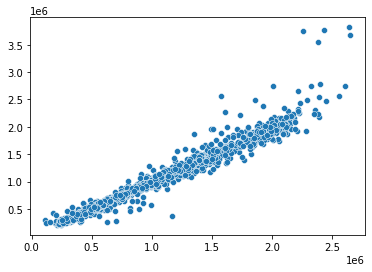

In [306]:
sns.scatterplot(y_pred, np.array(y_test));

1472

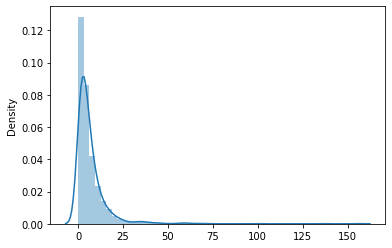

In [300]:
y_test=np.array(y_test)
ll=[round((abs(y_test[i]-y_pred[i])/y_pred[i])*100,2) for i in range(0,len(y_pred))]
#sns.distplot(df['Weekly_Sales'])
sns.distplot(ll)
len(ll)

In [321]:
len(y_test)

1472

In [317]:
def diff_y_ypred(i_y,i_y_pred,i_idx):
  l_y_arr=np.array(i_y)
  #
  l_delta=l_y_arr[i_idx]-i_y_pred[i_idx]
  print('Diff:',l_delta)
  print('Pourcentage d erreur: ', round((abs(l_delta)/l_y_arr[i_idx])*100,2),'%')
  #
  return round(l_y_arr[i_idx],2),' <-------> ',round(i_y_pred[i_idx],2)

diff_y_ypred(y_test,y_pred,10)

Diff: 15081.713749999995
Pourcentage d erreur:  2.94 %


(513073.87, ' <-------> ', 497992.16)

In [335]:
diff_y_ypred(y_test,y_pred,1200)

Diff: -26988.87999999989
Pourcentage d erreur:  2.26 %


(1192213.87, ' <-------> ', 1219202.8)

In [ ]:
#### The same raisonnement but now by Store

In [353]:
def diff_y_ypred_by_s(id_store,i_X,i_y,i_y_pred,i_idx):
  l_y_test_s=i_y[i_X['Store']==id_store]
  l_y_pred_s=i_y_pred[i_X['Store']==id_store]
  print('y_test/store-->',id_store,'=', len(l_y_test_s))
  if i_idx >= len(l_y_test_s):
    print('The index i_idx must be < ', len(l_y_test_s))
  else:
    diff_y_ypred(i_y,i_y_pred,i_idx)

diff_y_ypred_by_s(25,X_test,y_test,y_pred,5)

y_test/store--> 25 = 36
Diff: 812.766249999986
Pourcentage d erreur:  0.27 %


In [362]:
diff_y_ypred_by_s(31,X_test,y_test,y_pred,18)

y_test/store--> 31 = 38
Diff: 13914.528749999998
Pourcentage d erreur:  2.72 %


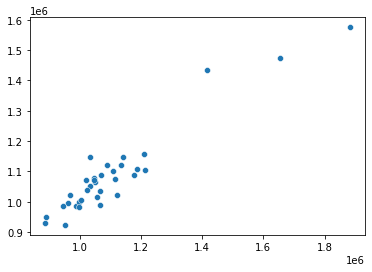

In [361]:
id_store=18
y_pred_s=y_test[X_test['Store']==id_store]
y_test_s=y_pred[X_test['Store']==id_store]
sns.scatterplot(y_pred_s, np.array(y_test_s))

In [ ]:
###############################################
########### FIN
#################################################

# XGBRegressor() Optimization with GridSearchCV

In [23]:
########################################################################
### With GridSearchCV we can have parameters that improve the score
### ------ We improve the score from 94.55% to more than 95.57% -------
########################################################################

from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()

parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [ 0.01,0.03],
              'max_depth': [8,9],
              'min_child_weight': [4,6],
              'silent': [1],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
              'n_estimators': [2500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 4,
                        n_jobs = 15,
                        verbose=True)
#
xgb_grid.fit(X_train,
         y_train)

print("Best----->",xgb_grid.best_score_)
print("best_params_", xgb_grid.best_params_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best-----> 0.9557040022031937
best_params_ {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 8, 'min_child_weight': 6, 'n_estimators': 2500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.5}
